# Project Team Id: PTID-CDS-JUN-24-1940

# Project Id: PRCP-1016


## Business Case:   
- Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, 
which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and 
one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs 
and this dataset contains 11 features that can be used to predict a possible heart disease.

- People with cardiovascular disease or who are at high cardiovascular risk.
(due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease)
need early detection and management wherein a machine learning model can be of great help.
- Our dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.



# Domain Analysis


In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [197]:
df1 = pd.read_csv(r"C:\Users\podem\Projects_Datamites\Heart_Disease_Prediction\Data\Heart_Disease.csv")
df1

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [198]:
df=df1.rename({'slope_of_peak_exercise_st_segment':'slope_segment','resting_blood_pressure':'rest_bp','chest_pain_type':'chest_pain',
          'num_major_vessels':'Vessels','fasting_blood_sugar_gt_120_mg_per_dl':'diabates','resting_ekg_results':'rest_ekg',
         'serum_cholesterol_mg_per_dl':'cholesterol' ,'oldpeak_eq_st_depression':'stress_test','max_heart_rate_achieved':'heart_rate',
         'exercise_induced_angina' :'eia','heart_disease_present':'heart_disease'},axis=1)

In [199]:
df.head()

,patient_id,slope_segment,thal,rest_bp,chest_pain,Vessels,diabates,rest_ekg,cholesterol,stress_test,sex,age,heart_rate,eia,heart_disease
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [200]:
df.drop('patient_id',axis=1,inplace=True)

### Basic Check

In [201]:
df.head()

,slope_segment,thal,rest_bp,chest_pain,Vessels,diabates,rest_ekg,cholesterol,stress_test,sex,age,heart_rate,eia,heart_disease
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [202]:
df.tail()

,slope_segment,thal,rest_bp,chest_pain,Vessels,diabates,rest_ekg,cholesterol,stress_test,sex,age,heart_rate,eia,heart_disease
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   slope_segment  180 non-null    int64  
 1   thal           180 non-null    object 
 2   rest_bp        180 non-null    int64  
 3   chest_pain     180 non-null    int64  
 4   Vessels        180 non-null    int64  
 5   diabates       180 non-null    int64  
 6   rest_ekg       180 non-null    int64  
 7   cholesterol    180 non-null    int64  
 8   stress_test    180 non-null    float64
 9   sex            180 non-null    int64  
 10  age            180 non-null    int64  
 11  heart_rate     180 non-null    int64  
 12  eia            180 non-null    int64  
 13  heart_disease  180 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 19.8+ KB


In [204]:
df.describe()

,slope_segment,rest_bp,chest_pain,Vessels,diabates,rest_ekg,cholesterol,stress_test,sex,age,heart_rate,eia,heart_disease
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [205]:
df.describe(include='O')

,thal
count,180
unique,3
top,normal
freq,98


In [206]:
df[df.duplicated()]

,slope_segment,thal,rest_bp,chest_pain,Vessels,diabates,rest_ekg,cholesterol,stress_test,sex,age,heart_rate,eia,heart_disease


In [207]:
df.columns

Index(['slope_segment', 'thal', 'rest_bp', 'chest_pain', 'Vessels', 'diabates',
       'rest_ekg', 'cholesterol', 'stress_test', 'sex', 'age', 'heart_rate',
       'eia', 'heart_disease'],
      dtype='object')

In [208]:
df.isnull().sum()

slope_segment    0
thal             0
rest_bp          0
chest_pain       0
Vessels          0
diabates         0
rest_ekg         0
cholesterol      0
stress_test      0
sex              0
age              0
heart_rate       0
eia              0
heart_disease    0
dtype: int64

In [209]:
df.slope_segment.unique()

array([1, 2, 3], dtype=int64)

In [210]:
df.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [211]:
cat_col=[]
num_col=[]

for i in df:
    if len(df[i].unique()) <= 10:
        cat_col.append(i)
    else:
        num_col.append(i)
    


In [212]:
df.head()

,slope_segment,thal,rest_bp,chest_pain,Vessels,diabates,rest_ekg,cholesterol,stress_test,sex,age,heart_rate,eia,heart_disease
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [213]:
df2=df[cat_col]
df2

,slope_segment,thal,chest_pain,Vessels,diabates,rest_ekg,sex,eia,heart_disease
0,1,normal,2,0,0,2,1,0,0
1,2,normal,3,0,0,0,0,0,0
2,1,normal,4,3,0,2,1,1,1
3,1,reversible_defect,4,0,0,0,1,0,1
4,3,reversible_defect,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,4,2,1,0,1,0,1
176,2,normal,4,0,0,1,0,1,1
177,2,reversible_defect,3,0,0,0,1,1,1
178,1,normal,3,2,1,0,1,0,0


In [214]:
df3=df[num_col]
df3

,rest_bp,cholesterol,stress_test,age,heart_rate
0,128,308,0.0,45,170
1,110,214,1.6,54,158
2,125,304,0.0,77,162
3,152,223,0.0,40,181
4,178,270,4.2,59,145
...,...,...,...,...,...
175,125,254,0.2,67,163
176,180,327,3.4,55,117
177,125,309,1.8,64,131
178,124,255,0.0,48,175


# EDA

## Univariate Analysis

In [215]:
'''import sweetviz as sv
results=sv.analyze(df)
results.show_html()'''

'import sweetviz as sv\nresults=sv.analyze(df)\nresults.show_html()'

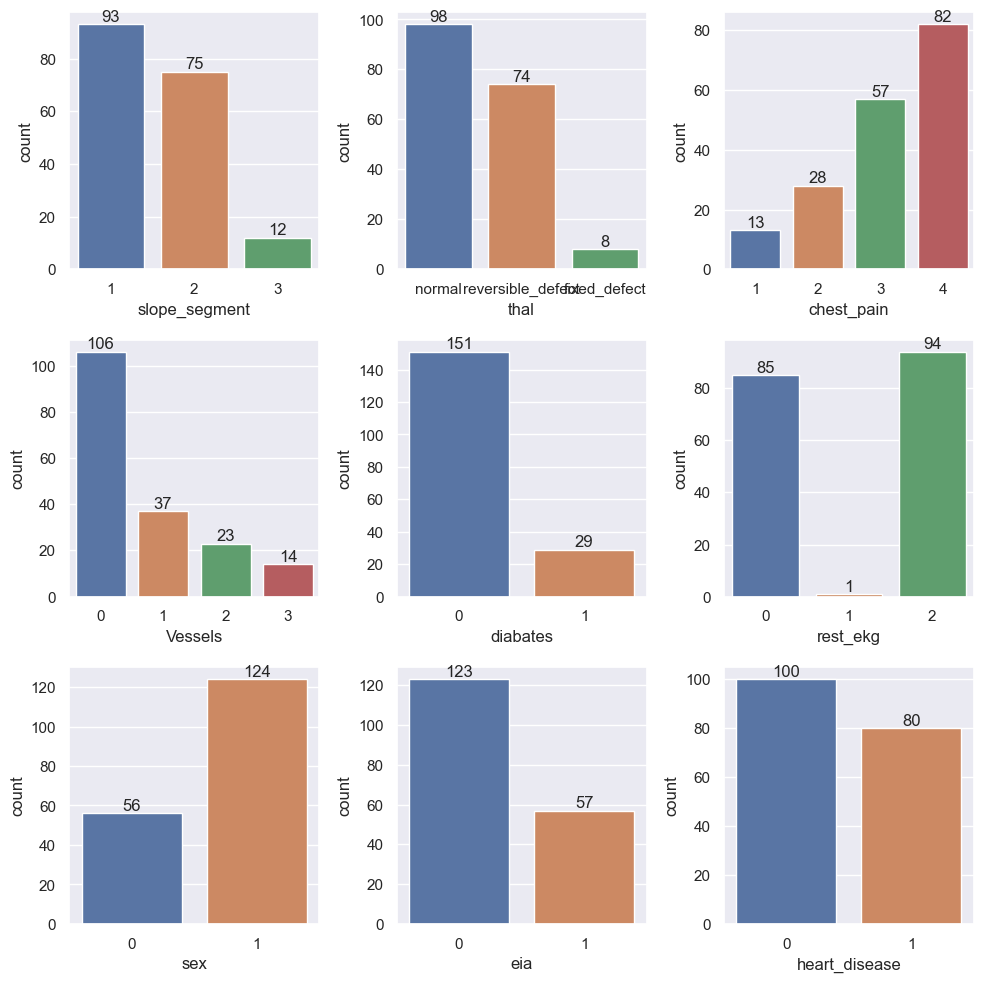

In [216]:
plt.figure(figsize=(10,10))
plot=1
for i in df2:
    plt.subplot(3,3,plot)
    
    ax=sns.countplot(x=df2[i])
    for j in ax.containers:
        ax.bar_label(j)
    
    
    plot+=1
plt.tight_layout()
    

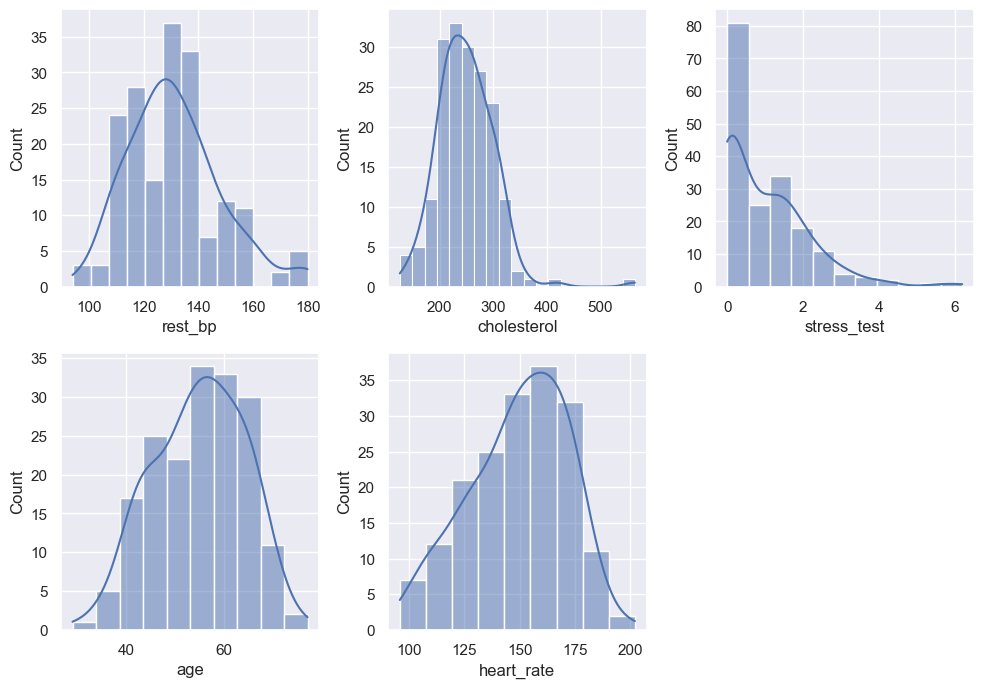

In [217]:
plt.figure(figsize=(10,10))
plot=1
for i in df3:
    plt.subplot(3,3,plot)
    ax=sns.histplot(x=df3[i],kde=True)
       
    plot+=1
plt.tight_layout()
    

Insights:
- In slope_segment 52% containing of 1 Category.
- thallium stress test(thal) of 54% having normal.
- resting_bp majority people having in between 120 to 145.
- chest_pain_type 4 containing of 46%.
- In vessels 0 type having Majority.
- Diabatic type 0 with 85%.
- rest_ekg type 2 having with 55%.
- Majority people having of cholesterol level between 180 to 320.
- Majority Pleople Stress_test level 0 to 0.5.
- In Sex, Male having the majority of 70%.
- Most of peolpe the Age lies between 40 to 65.
- Angina(eia) of type 0 containing with 80% of people.


## Bivariate Analysis

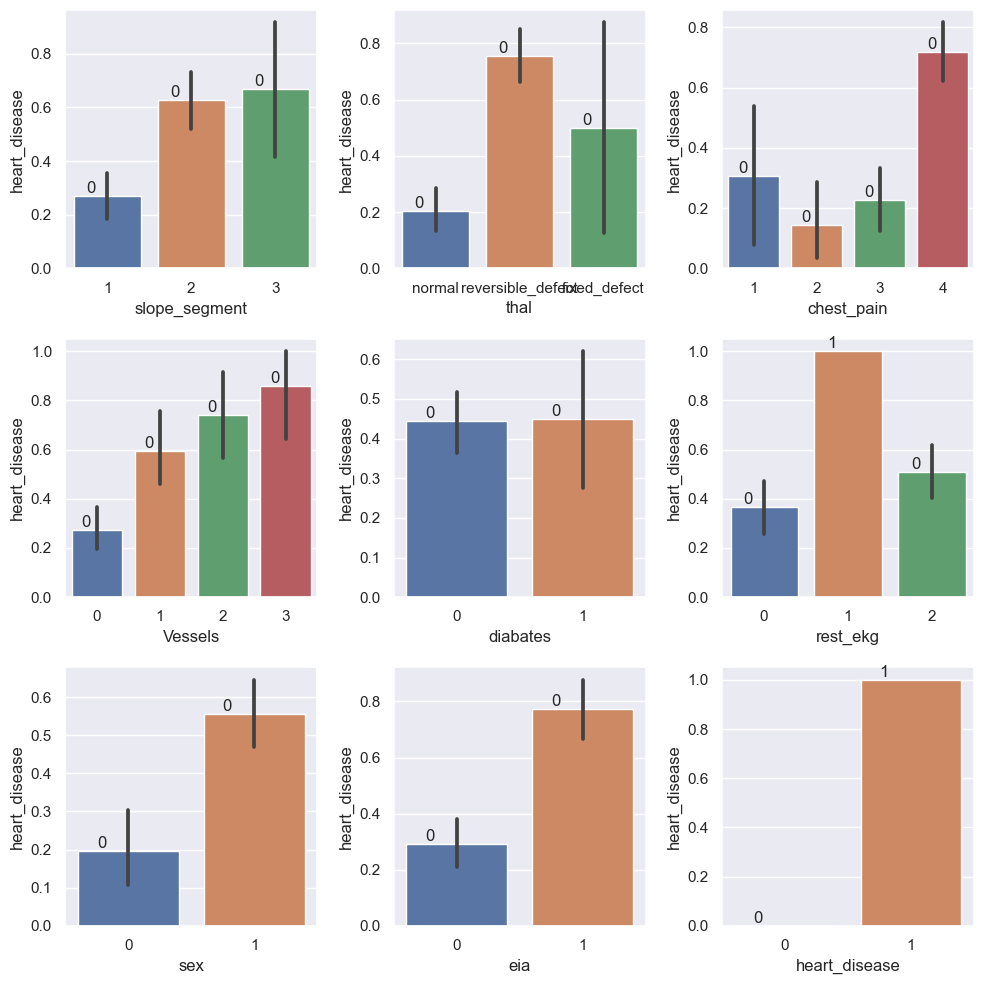

In [218]:
plt.figure(figsize=(10,10))
plot=1
for i in df2:
    plt.subplot(3,3,plot)
    ax=sns.barplot(x=df2[i],y=df.heart_disease)
    plot+=1
    for j in ax.patches:
        ax.annotate(int(j.get_height()),(j.get_x()+0.15,j.get_y()+j.get_height()), va = 'bottom')

plt.tight_layout()
    

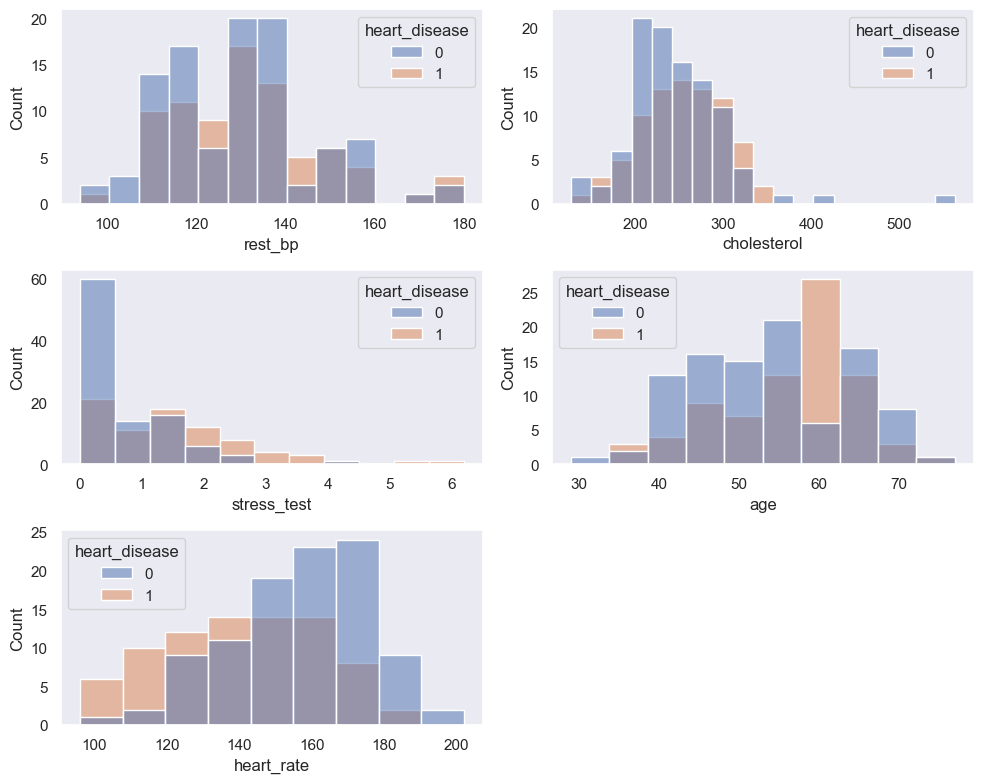

In [219]:
plt.figure(figsize=(10,8))
plot=1
for i in df3:
    plt.subplot(3,2,plot)
    sns.histplot(x=df3[i],hue=df.heart_disease)
    plt.grid()
       
    plot+=1
plt.tight_layout()
    

Insights:-
- Rest_bp range of 120 to 140 having majority people chances are high.
- Cholesterol range between 200-300 having the heart disease.
- stress_test level lies in between 0-3 .[0-1(mild),1-2(modarate),2-3(high)] having chances of heart disease.
- age between 45 to 70 having chances of heart disease..
- heart_rate range between 100-180 people getting chances of heart disease.
- Slope_segment type 2,3 having the high chances of heart disease.
- In thal reversible_defect value having more to get heart disease.
- chest_pain of type 4 people are more chances of heart disease..
- In vessel 3 type containing majority.
- Diabates almost having Equal chances of heart disease.
- rest_ekg majority refers to type 1 having more to get heart disease.
- male having the majority with heart_disease.
- Angina(eia) of type 1 having more to get heart disease.

# Data Preprocessing

### Handling with null values

In [220]:
df.isnull().sum()

slope_segment    0
thal             0
rest_bp          0
chest_pain       0
Vessels          0
diabates         0
rest_ekg         0
cholesterol      0
stress_test      0
sex              0
age              0
heart_rate       0
eia              0
heart_disease    0
dtype: int64

### Outlier

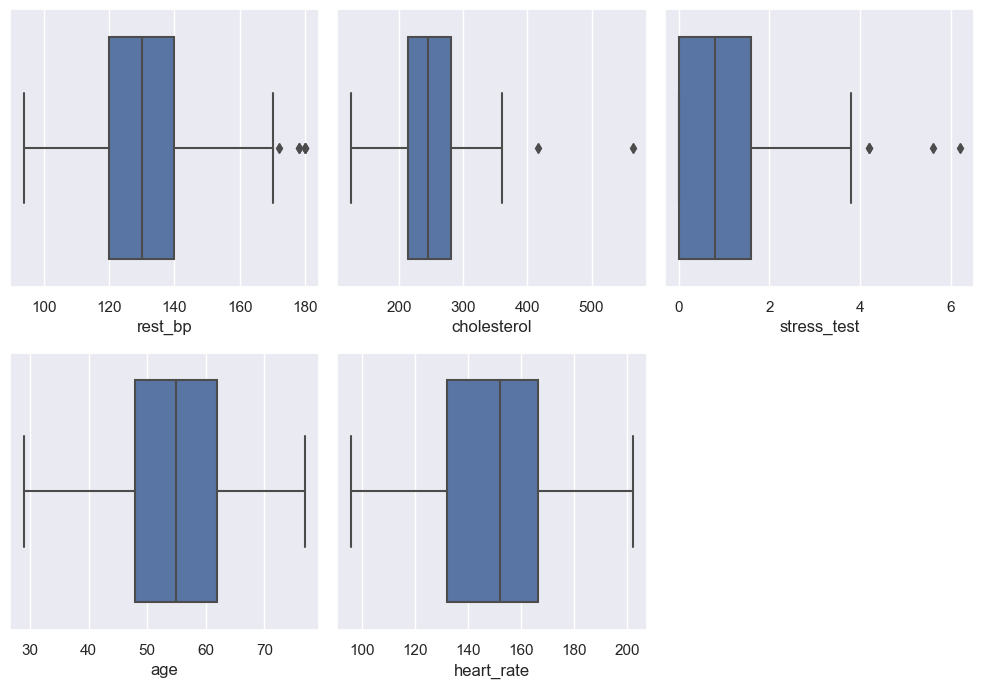

In [221]:
plt.figure(figsize=(10,10))
plot=1
for i in df3:
    plt.subplot(3,3,plot)
    sns.boxplot(x=df3[i])
       
    plot+=1
plt.tight_layout()
    

In [222]:
df.loc[df.rest_bp>170]

,slope_segment,thal,rest_bp,chest_pain,Vessels,diabates,rest_ekg,cholesterol,stress_test,sex,age,heart_rate,eia,heart_disease
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
33,1,normal,180,4,0,0,0,325,0.0,0,64,154,1,0
72,1,reversible_defect,172,3,0,1,0,199,0.5,1,52,162,0,0
75,2,reversible_defect,178,4,2,1,0,228,1.0,0,66,165,1,1
113,2,reversible_defect,180,3,0,1,2,274,1.6,1,68,150,1,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1


In [223]:
df.loc[df.rest_bp>170,'rest_bp']=np.median(df.rest_bp)


<Axes: xlabel='rest_bp'>

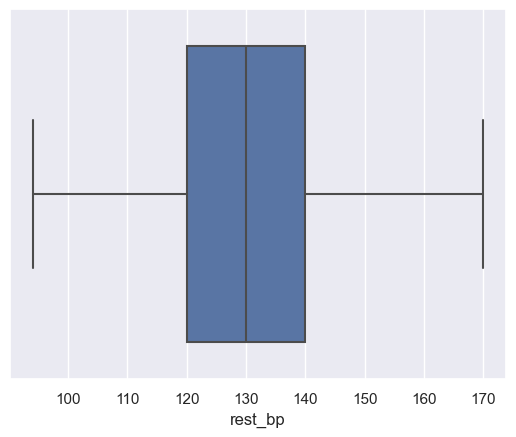

In [224]:
sns.boxplot(x=df.rest_bp)

In [225]:
df.loc[df.cholesterol>380]

,slope_segment,thal,rest_bp,chest_pain,Vessels,diabates,rest_ekg,cholesterol,stress_test,sex,age,heart_rate,eia,heart_disease
43,1,normal,140,3,1,1,2,417,0.8,0,65,157,0,0
60,2,reversible_defect,115,3,0,0,2,564,1.6,0,67,160,0,0


In [226]:
df.loc[df.cholesterol>380,'cholesterol'] = np.median(df.cholesterol)

<Axes: xlabel='cholesterol'>

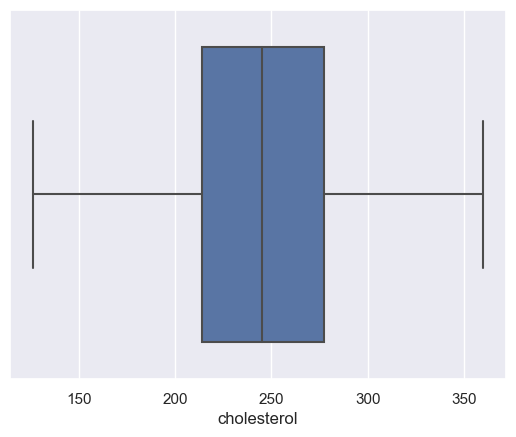

In [227]:
sns.boxplot(x=df.cholesterol)

In [228]:
df.loc[df.stress_test>3.9]

,slope_segment,thal,rest_bp,chest_pain,Vessels,diabates,rest_ekg,cholesterol,stress_test,sex,age,heart_rate,eia,heart_disease
4,3,reversible_defect,130,1,0,0,2,270.0,4.2,1,59,145,0,0
112,2,reversible_defect,140,4,3,0,0,298.0,4.2,1,51,122,1,1
140,3,reversible_defect,140,4,0,0,0,217.0,5.6,1,55,111,1,1
162,3,reversible_defect,160,4,3,0,2,164.0,6.2,0,62,145,0,1


In [229]:
df.loc[df.stress_test>3.9,'stress_test']=np.median(df.stress_test)

<Axes: xlabel='stress_test'>

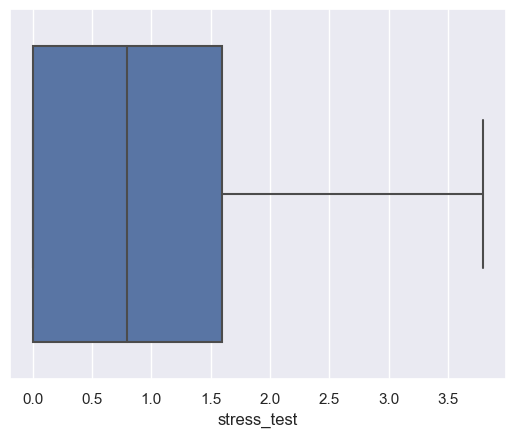

In [230]:
sns.boxplot(x=df.stress_test)

### Categorical to Numerical

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   slope_segment  180 non-null    int64  
 1   thal           180 non-null    object 
 2   rest_bp        180 non-null    int64  
 3   chest_pain     180 non-null    int64  
 4   Vessels        180 non-null    int64  
 5   diabates       180 non-null    int64  
 6   rest_ekg       180 non-null    int64  
 7   cholesterol    180 non-null    float64
 8   stress_test    180 non-null    float64
 9   sex            180 non-null    int64  
 10  age            180 non-null    int64  
 11  heart_rate     180 non-null    int64  
 12  eia            180 non-null    int64  
 13  heart_disease  180 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 19.8+ KB


In [232]:
df.thal.value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [233]:
df.thal = df.thal.replace({'reversible_defect':1,'fixed_defect':0,'normal':2})

In [234]:
df.head(10)

,slope_segment,thal,rest_bp,chest_pain,Vessels,diabates,rest_ekg,cholesterol,stress_test,sex,age,heart_rate,eia,heart_disease
0,1,2,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,2,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,2,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,1,1,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,1,130,1,0,0,2,270.0,0.8,1,59,145,0,0
5,1,2,130,3,0,0,0,180.0,0.0,1,42,150,0,0
6,2,1,150,4,2,0,2,258.0,2.6,0,60,157,0,1
7,2,0,150,4,1,0,2,276.0,0.6,1,57,112,1,1
8,3,1,170,4,0,0,2,326.0,3.4,1,59,140,1,1
9,2,2,120,3,0,0,0,219.0,1.6,0,50,158,0,0


In [235]:
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#df[['rest_bp','cholesterol','age','heart_rate']]=ss.fit_transform(df[['rest_bp','cholesterol','age','heart_rate']])


In [236]:
#df.head(10)

<Axes: title={'center': 'correlation with heart_disease'}>

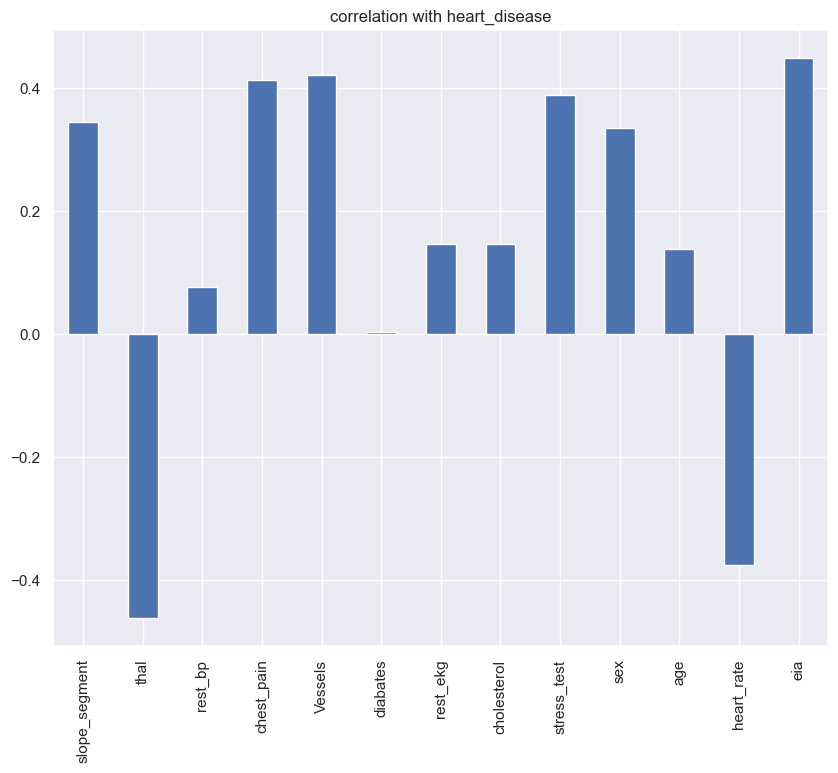

In [237]:
df3 = df.drop('heart_disease',axis=1)
df3.corrwith(df.heart_disease).plot.bar(figsize=(10,8),title ='correlation with heart_disease')

- 

### Feature Selection

<Axes: >

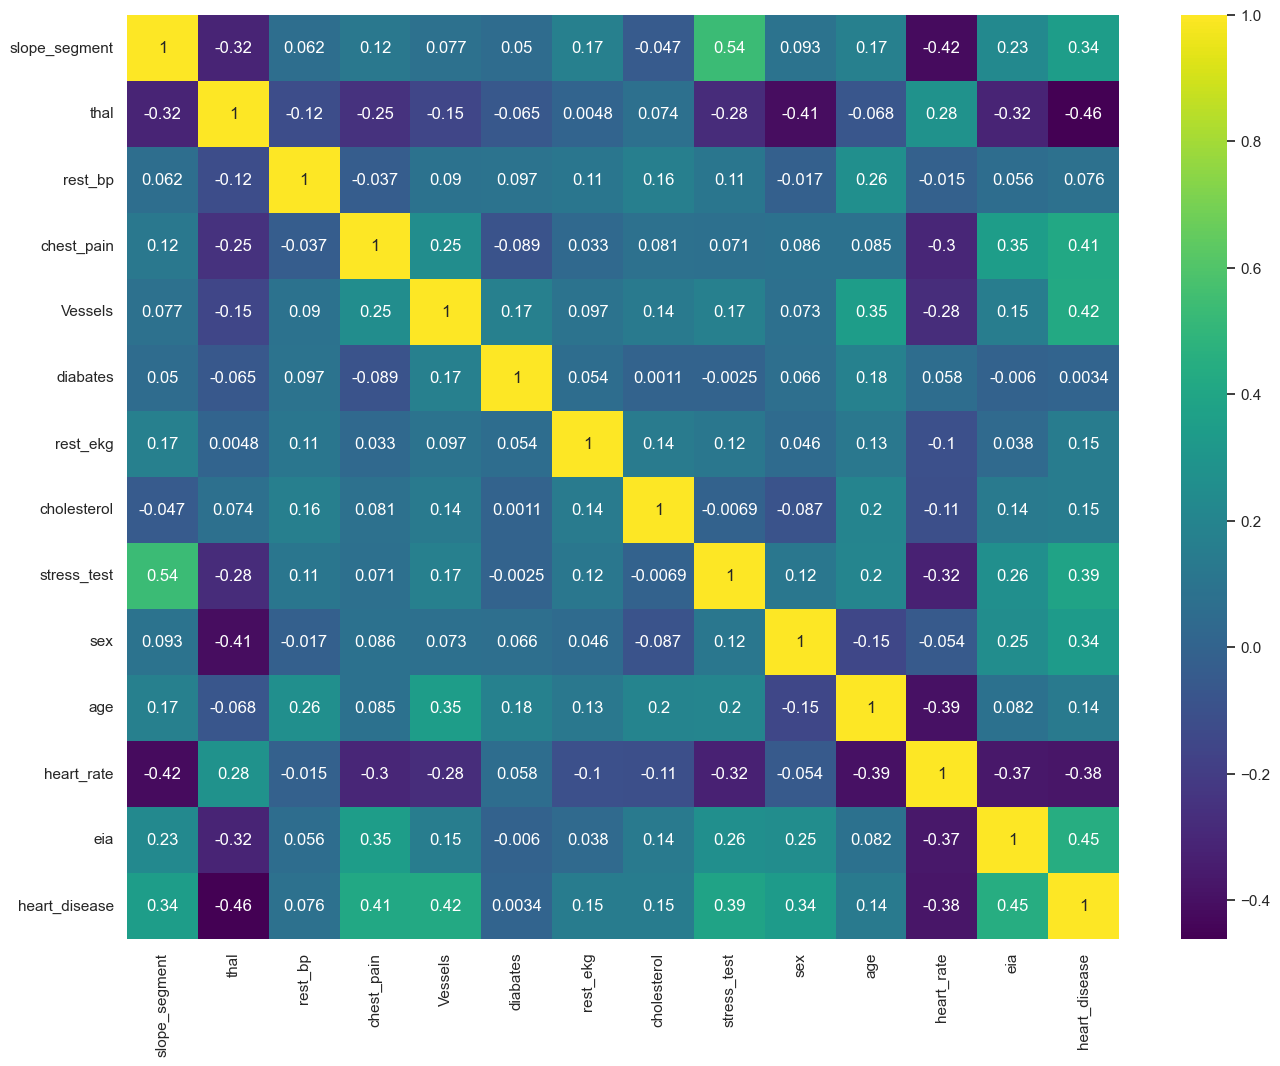

In [238]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [239]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix =dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [240]:
corr_features = correlation(df,0.9)
len(set(corr_features))


0

In [241]:
corr_features

set()

Insights:
- No corelation with independent features


### Model Creation

In [242]:
x=df.drop('heart_disease',axis=1)
x

,slope_segment,thal,rest_bp,chest_pain,Vessels,diabates,rest_ekg,cholesterol,stress_test,sex,age,heart_rate,eia
0,1,2,128,2,0,0,2,308.0,0.0,1,45,170,0
1,2,2,110,3,0,0,0,214.0,1.6,0,54,158,0
2,1,2,125,4,3,0,2,304.0,0.0,1,77,162,1
3,1,1,152,4,0,0,0,223.0,0.0,1,40,181,0
4,3,1,130,1,0,0,2,270.0,0.8,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,1,125,4,2,1,0,254.0,0.2,1,67,163,0
176,2,2,130,4,0,0,1,327.0,3.4,0,55,117,1
177,2,1,125,3,0,0,0,309.0,1.8,1,64,131,1
178,1,2,124,3,2,1,0,255.0,0.0,1,48,175,0


In [243]:
y=df.heart_disease
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease, Length: 180, dtype: int64

In [244]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [245]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 13)
(45, 13)
(135,)
(45,)


In [246]:
y_train.value_counts()

heart_disease
0    81
1    54
Name: count, dtype: int64

In [247]:
y_test.value_counts()

heart_disease
1    26
0    19
Name: count, dtype: int64

### Scaling

In [248]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [249]:
sc_xtrain=sc.fit_transform(x_train)
sc_xtrain

array([[-0.84315626,  0.84696168,  0.02507106, ..., -1.62998251,
         1.03899291, -0.6953535 ],
       [ 0.71610532,  0.84696168,  0.30136438, ..., -0.7087993 ,
         0.5795627 , -0.6953535 ],
       [-0.84315626,  0.84696168, -0.66566223, ...,  2.16989822,
        -1.30410115,  1.43811746],
       ...,
       [ 0.71610532, -0.83450636, -0.66566223, ..., -1.97542621,
         1.49842312,  1.43811746],
       [-0.84315626,  0.84696168,  0.3704377 , ..., -0.1330598 ,
         0.94710687, -0.6953535 ],
       [ 0.71610532, -0.83450636, -1.35639552, ...,  0.44267971,
        -0.33929772,  1.43811746]])

In [250]:
sc_xtest = sc.transform(x_test)
sc_xtest

array([[-0.84315626,  0.84696168,  0.43951103, -1.19838008,  1.39096463,
         2.20670914,  1.01870703,  1.70833033, -0.94242362, -1.41421356,
         0.32753181,  0.12013249, -0.6953535 ],
       [-0.84315626,  0.84696168, -1.35639552, -0.14785209,  0.33601955,
         2.20670914,  1.01870703,  0.48250936, -0.94242362, -1.41421356,
         1.82445452, -0.89061397, -0.6953535 ],
       [-0.84315626,  0.84696168, -1.21824886,  0.9026759 ,  0.33601955,
        -0.45316348,  1.01870703,  1.05001907, -0.94242362,  0.70710678,
        -1.2845388 ,  0.16607551, -0.6953535 ],
       [ 0.71610532, -0.83450636,  1.06117099,  0.9026759 ,  1.39096463,
        -0.45316348,  1.01870703,  0.86841596,  2.00167662,  0.70710678,
         0.55782761, -0.33929772,  1.43811746],
       [-0.84315626,  0.84696168,  0.71580435, -1.19838008,  1.39096463,
        -0.45316348, -0.98896376, -1.10651781, -0.94242362, -1.41421356,
         0.90327131,  1.36059405, -0.6953535 ],
       [ 0.71610532, -0.834506

### Balancing:

In [251]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [252]:
x_sm,y_sm=sm.fit_resample(sc_xtrain,y_train)

In [253]:
print(x_sm.shape)
print(x_test.shape)
print(y_sm.shape)
print(y_test.shape)

(162, 13)
(45, 13)
(162,)
(45,)


In [254]:
y_sm.value_counts()

heart_disease
0    81
1    81
Name: count, dtype: int64

## Logistic Regression

In [255]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_sm,y_sm)

LogisticRegression(random_state=42)

In [256]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report

### Testing data for LR

In [257]:
lr_pred =lr.predict(sc_xtest)
lr_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [258]:
lr_acc = accuracy_score(y_test,lr_pred)
lr_acc

0.8

In [259]:
print('f1_score: ',f1_score(y_test,lr_pred))
print('precision_score: ',precision_score(y_test,lr_pred))
print('recall_score: ',recall_score(y_test,lr_pred))
print('roc_auc_score: ',roc_auc_score(y_test,lr_pred))

print("==========================")

print('confusion_matrix: ',confusion_matrix(y_test,lr_pred))
print('classification_report',classification_report(y_test,lr_pred))



f1_score:  0.8163265306122449
precision_score:  0.8695652173913043
recall_score:  0.7692307692307693
roc_auc_score:  0.8056680161943319
confusion_matrix:  [[16  3]
 [ 6 20]]
classification_report               precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.87      0.77      0.82        26

    accuracy                           0.80        45
   macro avg       0.80      0.81      0.80        45
weighted avg       0.81      0.80      0.80        45



### Training data for LR

In [260]:
lr_pred1 = lr.predict(x_sm)
lr_pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [261]:
lr_acc_tr =accuracy_score(y_sm,lr_pred1)
lr_acc_tr

0.8827160493827161

In [262]:
print('f1_score_tr: ',f1_score(y_sm,lr_pred1))
print('precision_score_tr: ',precision_score(y_sm,lr_pred1))
print('recall_score_tr: ',recall_score(y_sm,lr_pred1))
print('roc_auc_score_tr: ',roc_auc_score(y_sm,lr_pred1))

print("==========================")

print('confusion_matrix_tr: ',confusion_matrix(y_sm,lr_pred1))
print('classification_report',classification_report(y_sm,lr_pred1))


f1_score_tr:  0.8848484848484849
precision_score_tr:  0.8690476190476191
recall_score_tr:  0.9012345679012346
roc_auc_score_tr:  0.8827160493827161
confusion_matrix_tr:  [[70 11]
 [ 8 73]]
classification_report               precision    recall  f1-score   support

           0       0.90      0.86      0.88        81
           1       0.87      0.90      0.88        81

    accuracy                           0.88       162
   macro avg       0.88      0.88      0.88       162
weighted avg       0.88      0.88      0.88       162



### Using Bagging for Logistic Regressor

In [263]:
from sklearn.ensemble import BaggingClassifier
model1= BaggingClassifier(base_estimator=lr,n_estimators=100,random_state=42)
model1.fit(x_sm,y_sm)

BaggingClassifier(base_estimator=LogisticRegression(random_state=42),
                  n_estimators=100, random_state=42)

### Bagging of Testing for LR

In [264]:
y_Pred=model1.predict(sc_xtest)
y_Pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [265]:
lr_Bagg=accuracy_score(y_test,y_Pred)
lr_Bagg

0.8

### Bagging of Training for LR

In [266]:
y_Pred1=model1.predict(x_sm)
y_Pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [267]:
lr_Bagg_tr=accuracy_score(y_sm,y_Pred1)
lr_Bagg_tr

0.8888888888888888

## Support Vector Machine

In [268]:
from sklearn.svm import SVC
sc = SVC(kernel='rbf',random_state=42)
sc.fit(x_sm,y_sm)

SVC(random_state=42)

In [269]:
y_pred1=sc.predict(sc_xtest)
y_pred1

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

### Testing data for SVM

In [270]:
sc_acc1 =accuracy_score(y_test,y_pred1)
sc_acc1

0.8888888888888888

In [271]:
print('f1_score: ',f1_score(y_test,y_pred1))
print('precision_score: ',precision_score(y_test,y_pred1))
print('recall_score: ',recall_score(y_test,y_pred1))
print('roc_auc_score: ',roc_auc_score(y_test,y_pred1))

print("==========================")

print('confusion_matrix: ',confusion_matrix(y_test,y_pred1))
print('classification_report',classification_report(y_test,y_pred1))


f1_score:  0.8936170212765957
precision_score:  1.0
recall_score:  0.8076923076923077
roc_auc_score:  0.9038461538461539
confusion_matrix:  [[19  0]
 [ 5 21]]
classification_report               precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.81      0.89        26

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.89        45
weighted avg       0.91      0.89      0.89        45



### Training data for SVM 

In [272]:
y_pred2=sc.predict(x_sm)
y_pred2

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [273]:
sc_acc_tr2 = accuracy_score(y_sm,y_pred2)
sc_acc_tr2

0.9444444444444444

### Hypertuning parameter for SVM

In [274]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,10,100,1000],'gamma':[1,0.1,0.01,.001,0.0001]}

In [275]:
grid = GridSearchCV(sc,param_grid,scoring='accuracy',verbose=1,cv=5)
grid.fit(x_sm,y_sm)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy', verbose=1)

In [276]:
y_pred =grid.predict(sc_xtest)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

### Testing for SVM by HyperParameter

In [277]:
sc_acc_hyp =accuracy_score(y_test,y_pred)
sc_acc_hyp

0.8

In [278]:
print('f1_score: ',f1_score(y_test,y_pred))
print('precision_score: ',precision_score(y_test,y_pred))
print('recall_score: ',recall_score(y_test,y_pred))
print('roc_auc_score: ',roc_auc_score(y_test,y_pred))

print("==========================")

print('confusion_matrix: ',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))


f1_score:  0.8085106382978723
precision_score:  0.9047619047619048
recall_score:  0.7307692307692307
roc_auc_score:  0.812753036437247
confusion_matrix:  [[17  2]
 [ 7 19]]
classification_report               precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.90      0.73      0.81        26

    accuracy                           0.80        45
   macro avg       0.81      0.81      0.80        45
weighted avg       0.82      0.80      0.80        45



### Training for SVM by HyperParameter

In [279]:
y_pred1 = grid.predict(x_sm)
y_pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [280]:
sc_acc_hyp_tr =accuracy_score(y_sm,y_pred1)
sc_acc_hyp_tr

1.0

### Using Bagging for SVM

In [281]:
model2=BaggingClassifier(base_estimator=grid,n_estimators=100,random_state=42)
model2.fit(x_sm,y_sm)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 

BaggingClassifier(base_estimator=GridSearchCV(cv=5,
                                              estimator=SVC(random_state=42),
                                              param_grid={'C': [0.1, 1, 10, 10,
                                                                100, 1000],
                                                          'gamma': [1, 0.1,
                                                                    0.01, 0.001,
                                                                    0.0001]},
                                              scoring='accuracy', verbose=1),
                  n_estimators=100, random_state=42)

In [282]:
y_pred=model2.predict(sc_xtest)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [283]:
sc_Bagg=accuracy_score(y_test,y_pred)
sc_Bagg

0.8444444444444444

In [284]:
y_Pred1=model2.predict(x_sm)
y_Pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [285]:
sc_Bagg_tr =accuracy_score(y_sm,y_Pred1)
sc_Bagg_tr

1.0

## KNN

In [286]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_sm,y_sm)

KNeighborsClassifier()

In [287]:
y_pred1= knn.predict(sc_xtest)
y_pred1

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [288]:
x_test.sum()

slope_segment       71.0
thal                68.0
rest_bp           5847.0
chest_pain         144.0
Vessels             33.0
diabates             6.0
rest_ekg            56.0
cholesterol      11462.5
stress_test         43.8
sex                 34.0
age               2420.0
heart_rate        6740.0
eia                 13.0
dtype: float64

In [289]:
y_test.sum()

26

In [290]:
(y_test!=y_pred1).sum()

6

In [291]:
len(y_test)

45

In [292]:
(y_test!=y_pred1).sum()/len(y_test) #error

0.13333333333333333

In [293]:
Error =[]

for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_sm,y_sm)
    y_pred1=knn.predict(x_test)
    error=(y_test!=y_pred1).sum()/len(y_test)
    Error.append(error)
    

In [294]:
Error

[0.28888888888888886,
 0.5777777777777777,
 0.5111111111111111,
 0.4222222222222222,
 0.4222222222222222,
 0.4666666666666667,
 0.35555555555555557,
 0.4444444444444444,
 0.3333333333333333,
 0.5333333333333333]

Text(0, 0.5, 'Error')

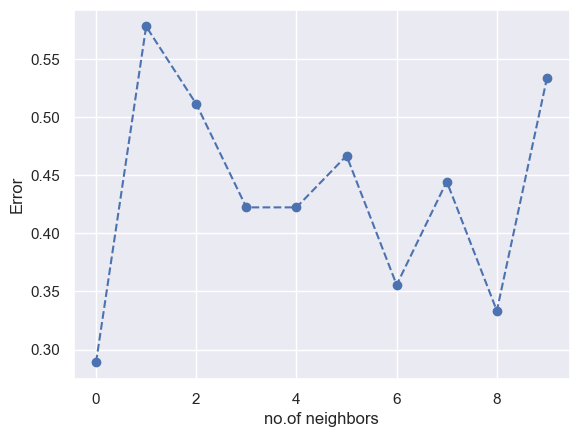

In [295]:
plt.plot(Error,marker='o',linestyle='dashed')
plt.xlabel('no.of neighbors')
plt.ylabel('Error')

In [296]:
knn1 =KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_sm,y_sm)
y_pred = knn1.predict(sc_xtest)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

### Testing data for KNN

In [297]:
acc_knn =accuracy_score(y_test,y_pred)
acc_knn

0.8666666666666667

In [298]:
print('f1_score: ',f1_score(y_test,y_pred))
print('precision_score: ',precision_score(y_test,y_pred))
print('recall_score: ',recall_score(y_test,y_pred))
print('roc_auc_score: ',roc_auc_score(y_test,y_pred))

print("==========================")

print('confusion_matrix: ',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))



f1_score:  0.875
precision_score:  0.9545454545454546
recall_score:  0.8076923076923077
roc_auc_score:  0.8775303643724697
confusion_matrix:  [[18  1]
 [ 5 21]]
classification_report               precision    recall  f1-score   support

           0       0.78      0.95      0.86        19
           1       0.95      0.81      0.88        26

    accuracy                           0.87        45
   macro avg       0.87      0.88      0.87        45
weighted avg       0.88      0.87      0.87        45



### Training Data for KNN

In [299]:
y_pred1=knn1.predict(x_sm)
y_pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [300]:
acc_knn_tr=accuracy_score(y_sm,y_pred1)
acc_knn_tr

0.8827160493827161

In [301]:
print('f1_score: ',f1_score(y_sm,y_pred1))
print('precision_score: ',precision_score(y_sm,y_pred1))
print('recall_score: ',recall_score(y_sm,y_pred1))
print('roc_auc_score: ',roc_auc_score(y_sm,y_pred1))

print("==========================")

print('confusion_matrix: ',confusion_matrix(y_sm,y_pred1))
print('classification_report',classification_report(y_sm,y_pred1))


f1_score:  0.8914285714285713
precision_score:  0.8297872340425532
recall_score:  0.9629629629629629
roc_auc_score:  0.8827160493827161
confusion_matrix:  [[65 16]
 [ 3 78]]
classification_report               precision    recall  f1-score   support

           0       0.96      0.80      0.87        81
           1       0.83      0.96      0.89        81

    accuracy                           0.88       162
   macro avg       0.89      0.88      0.88       162
weighted avg       0.89      0.88      0.88       162



### Bagging With KNN

In [302]:
model3 =BaggingClassifier(base_estimator=knn1,n_estimators=100,random_state=42)
model3.fit(x_sm,y_sm)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=100,
                  random_state=42)

In [303]:
y_Pred=model3.predict(sc_xtest)
y_Pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [304]:
knn_Bagg=accuracy_score(y_test,y_Pred)
knn_Bagg

0.8666666666666667

In [305]:
y_Pred1=model3.predict(x_sm)
y_Pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [306]:
knn_Bagg_tr=accuracy_score(y_sm,y_Pred1)
knn_Bagg_tr

0.8888888888888888

### Decision Tree

In [307]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_sm,y_sm)

DecisionTreeClassifier(random_state=42)

### Testing data for Decision tree 

In [308]:
y_pred =dt.predict(sc_xtest)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1], dtype=int64)

In [309]:
acc_dt =accuracy_score(y_test,y_pred)
acc_dt

0.7111111111111111

In [310]:
print('f1_score: ',f1_score(y_test,y_pred))
print('precision_score: ',precision_score(y_test,y_pred))
print('recall_score: ',recall_score(y_test,y_pred))
print('roc_auc_score: ',roc_auc_score(y_test,y_pred))

print("==========================")

print('confusion_matrix: ',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))



f1_score:  0.7111111111111111
precision_score:  0.8421052631578947
recall_score:  0.6153846153846154
roc_auc_score:  0.728744939271255
confusion_matrix:  [[16  3]
 [10 16]]
classification_report               precision    recall  f1-score   support

           0       0.62      0.84      0.71        19
           1       0.84      0.62      0.71        26

    accuracy                           0.71        45
   macro avg       0.73      0.73      0.71        45
weighted avg       0.75      0.71      0.71        45



### Training data for Decision tree

In [311]:
y_pred1 = dt.predict(x_sm)
y_pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [312]:
acc_dt_tr=accuracy_score(y_sm,y_pred1)
acc_dt_tr

1.0

In [313]:
print('f1_score: ',f1_score(y_sm,y_pred1))
print('precision_score: ',precision_score(y_sm,y_pred1))
print('recall_score: ',recall_score(y_sm,y_pred1))
print('roc_auc_score: ',roc_auc_score(y_sm,y_pred1))

print("==========================")

print('confusion_matrix: ',confusion_matrix(y_sm,y_pred1))
print('classification_report',classification_report(y_sm,y_pred1))


f1_score:  1.0
precision_score:  1.0
recall_score:  1.0
roc_auc_score:  1.0
confusion_matrix:  [[81  0]
 [ 0 81]]
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        81

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



### Hyperparameter Tuning for Decision Tree

In [314]:
from sklearn.model_selection import GridSearchCV

In [315]:
param_grid = { 'criterion':('gini','entropy'),
              'splitter':('best','random'),
              'max_depth': [ 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
                            }

In [316]:
grid =GridSearchCV(dt,param_grid,cv=5,verbose=5,scoring='accuracy')

In [317]:
grid.fit(x_sm,y_sm)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.727 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.788 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.531 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.875 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.727 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=

[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.688 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.906 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.697 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.727 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.625 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5,

[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.844 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.818 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.697 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.656 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.844 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min

[CV 4/5] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.844 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.697 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.727 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.625 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.844 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_sp

[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.906 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.727 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.719 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.875 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.727 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, 

[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.727 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.656 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.844 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.844 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.818 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.727 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.719 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min

[CV 2/5] END criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.719 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.906 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.727 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.818 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.656 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, min_samp

[CV 3/5] END criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.719 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.906 total time=   0.0s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=5)

In [318]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [319]:
DT=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1,splitter='random',min_samples_split=2,
                          random_state=42)

In [320]:
DT.fit(x_sm,y_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42,
                       splitter='random')

### Testing data for Decision tree by hyperparameter tuning

In [321]:
y_pred = DT.predict(sc_xtest)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [322]:
acc_DT=accuracy_score(y_test,y_pred)
acc_DT

0.7333333333333333

In [323]:
print('f1_score: ',f1_score(y_test,y_pred))
print('precision_score: ',precision_score(y_test,y_pred))
print('recall_score: ',recall_score(y_test,y_pred))
print('roc_auc_score: ',roc_auc_score(y_test,y_pred))

print("==========================")

print('confusion_matrix: ',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))



f1_score:  0.7272727272727274
precision_score:  0.8888888888888888
recall_score:  0.6153846153846154
roc_auc_score:  0.7550607287449392
confusion_matrix:  [[17  2]
 [10 16]]
classification_report               precision    recall  f1-score   support

           0       0.63      0.89      0.74        19
           1       0.89      0.62      0.73        26

    accuracy                           0.73        45
   macro avg       0.76      0.76      0.73        45
weighted avg       0.78      0.73      0.73        45



### Training data for Decision tree by hyperparameter tuning

In [324]:
y_pred1 = DT.predict(x_sm)
y_pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [325]:
acc_DT_tr =accuracy_score(y_sm,y_pred1)
acc_DT_tr

0.9259259259259259

In [326]:
print('f1_score: ',f1_score(y_sm,y_pred1))
print('precision_score: ',precision_score(y_sm,y_pred1))
print('recall_score: ',recall_score(y_sm,y_pred1))
print('roc_auc_score: ',roc_auc_score(y_sm,y_pred1))

print("==========================")

print('confusion_matrix: ',confusion_matrix(y_sm,y_pred1))
print('classification_report',classification_report(y_sm,y_pred1))


f1_score:  0.9259259259259259
precision_score:  0.9259259259259259
recall_score:  0.9259259259259259
roc_auc_score:  0.925925925925926
confusion_matrix:  [[75  6]
 [ 6 75]]
classification_report               precision    recall  f1-score   support

           0       0.93      0.93      0.93        81
           1       0.93      0.93      0.93        81

    accuracy                           0.93       162
   macro avg       0.93      0.93      0.93       162
weighted avg       0.93      0.93      0.93       162



In [327]:
df.columns

Index(['slope_segment', 'thal', 'rest_bp', 'chest_pain', 'Vessels', 'diabates',
       'rest_ekg', 'cholesterol', 'stress_test', 'sex', 'age', 'heart_rate',
       'eia', 'heart_disease'],
      dtype='object')

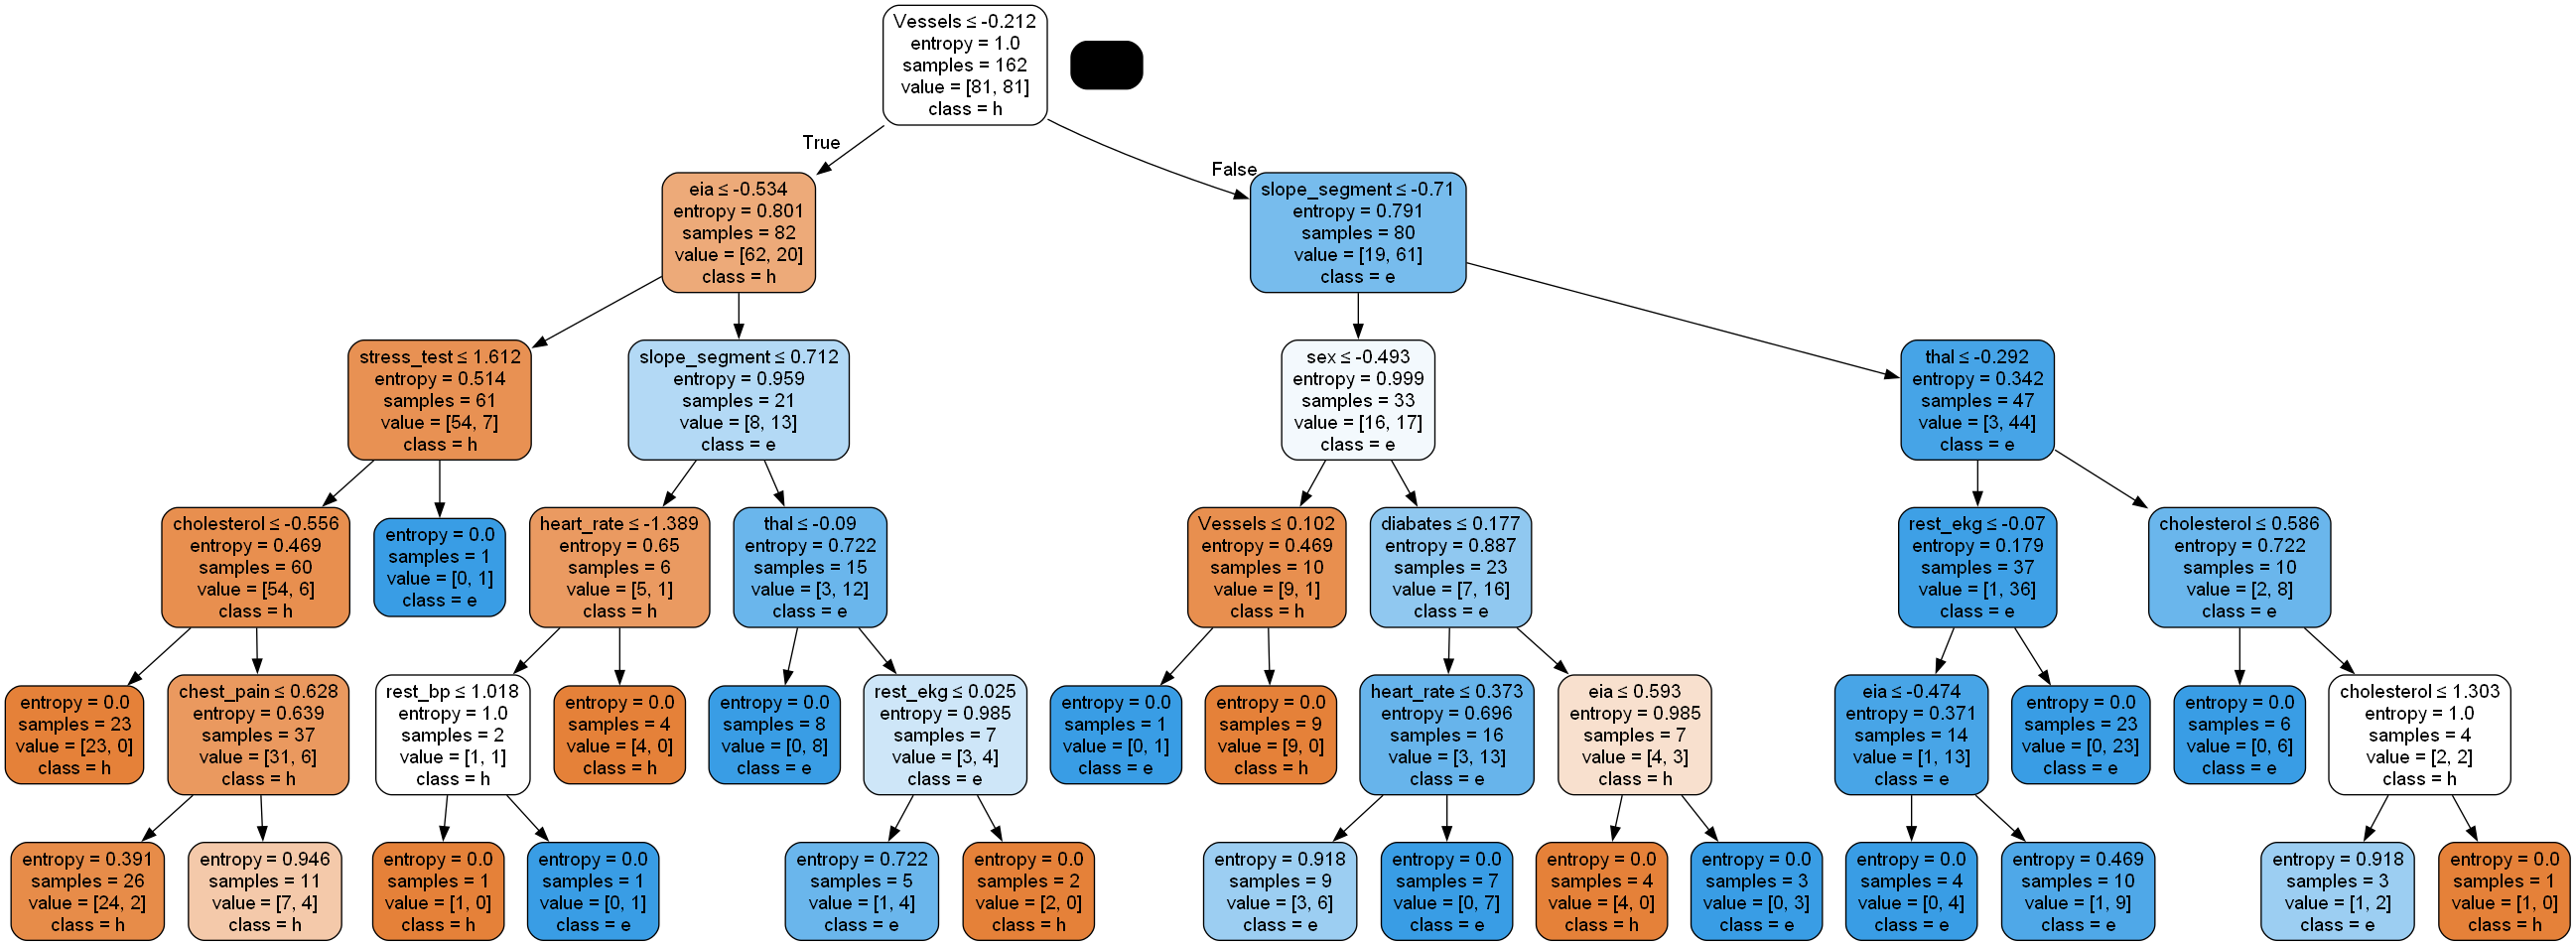

In [328]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import pydotplus

# Assuming `DT` is your trained Decision Tree model and `df.columns[:-1]` are your feature names
feature_names = ['slope_segment', 'thal', 'rest_bp', 'chest_pain', 'Vessels', 'diabates',
       'rest_ekg', 'cholesterol', 'stress_test', 'sex', 'age', 'heart_rate',
       'eia']
target_name = 'heart_disease'

# Export the decision tree to a dot file
dot_data = export_graphviz(DT, out_file=None, 
                           feature_names=feature_names,  
                           class_names=target_name,  
                           filled=True, rounded=True,  
                           special_characters=True)


# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph
Image(graph.create_png())

### Bagging With Decision Tree

In [329]:
model4=BaggingClassifier(base_estimator=DT,n_estimators=100,random_state=42)
model4.fit(x_sm,y_sm)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=42,
                                                        splitter='random'),
                  n_estimators=100, random_state=42)

In [330]:
y_Pred=model4.predict(sc_xtest)
y_Pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [331]:
DT_Bagg=accuracy_score(y_test,y_Pred)
DT_Bagg

0.8444444444444444

In [332]:
y_Pred1=model4.predict(x_sm)
y_Pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [333]:
DT_Bagg_tr=accuracy_score(y_sm,y_Pred1)
DT_Bagg_tr

0.9753086419753086

### Random Forest

In [334]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_sm,y_sm)

RandomForestClassifier(random_state=42)

### Testing data for RF

In [335]:
y_pred = rf.predict(sc_xtest)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [336]:
acc_rf = accuracy_score(y_test,y_pred)
acc_rf

0.8666666666666667

In [337]:
print('f1_score: ',f1_score(y_test,y_pred))
print('precision_score: ',precision_score(y_test,y_pred))
print('recall_score: ',recall_score(y_test,y_pred))
print('roc_auc_score: ',roc_auc_score(y_test,y_pred))

print("==========================")

print('confusion_matrix: ',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))



f1_score:  0.8695652173913044
precision_score:  1.0
recall_score:  0.7692307692307693
roc_auc_score:  0.8846153846153846
confusion_matrix:  [[19  0]
 [ 6 20]]
classification_report               precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       1.00      0.77      0.87        26

    accuracy                           0.87        45
   macro avg       0.88      0.88      0.87        45
weighted avg       0.90      0.87      0.87        45



### Training data for RF

In [338]:
y_pred1= rf.predict(x_sm)
y_pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [339]:
acc_rf_tr =accuracy_score(y_sm,y_pred1)
acc_rf_tr

1.0

In [340]:
print('f1_score: ',f1_score(y_sm,y_pred1))
print('precision_score: ',precision_score(y_sm,y_pred1))
print('recall_score: ',recall_score(y_sm,y_pred1))
print('roc_auc_score: ',roc_auc_score(y_sm,y_pred1))

print("==========================")

print('confusion_matrix: ',confusion_matrix(y_sm,y_pred1))
print('classification_report',classification_report(y_sm,y_pred1))


f1_score:  1.0
precision_score:  1.0
recall_score:  1.0
roc_auc_score:  1.0
confusion_matrix:  [[81  0]
 [ 0 81]]
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        81

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



### Hyperparameter tuning for Random Forest

In [341]:
from sklearn.model_selection import RandomizedSearchCV

In [342]:
params = {'n_estimators': range(50, 200),  
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [100,200],  
    'min_samples_split':list(range(2, 20)),  
    'min_samples_leaf':list(range(1, 20))
    }

In [343]:
rf1 = RandomizedSearchCV(rf,param_distributions=params,verbose=1,scoring='accuracy',cv=5,random_state=42)

In [344]:
rf1.fit(x_sm,y_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [100, 200],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19],
                                        'n_estimators': range(50, 200)},
                   random_state=42, scoring='accuracy', verbose=1)

In [345]:
rf1.best_params_

{'n_estimators': 67,
 'min_samples_split': 9,
 'min_samples_leaf': 17,
 'max_features': 'auto',
 'max_depth': 200}

In [346]:
RF = RandomForestClassifier(n_estimators=54,min_samples_split=4,min_samples_leaf=3,max_features='auto',max_depth=100,random_state=42)

In [347]:
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=100, max_features='auto', min_samples_leaf=3,
                       min_samples_split=4, n_estimators=54, random_state=42)

### Testing data for rf by hyperparameter tuning

In [348]:
y_pred=RF.predict(sc_xtest)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0], dtype=int64)

In [349]:
acc_RF_hyp = accuracy_score(y_test,y_pred)
acc_RF_hyp

0.5333333333333333

In [350]:
print('f1_score: ',f1_score(y_test,y_pred))
print('precision_score: ',precision_score(y_test,y_pred))
print('recall_score: ',recall_score(y_test,y_pred))
print('roc_auc_score: ',roc_auc_score(y_test,y_pred))

print("==========================")

print('confusion_matrix: ',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))



f1_score:  0.32258064516129037
precision_score:  1.0
recall_score:  0.19230769230769232
roc_auc_score:  0.5961538461538461
confusion_matrix:  [[19  0]
 [21  5]]
classification_report               precision    recall  f1-score   support

           0       0.47      1.00      0.64        19
           1       1.00      0.19      0.32        26

    accuracy                           0.53        45
   macro avg       0.74      0.60      0.48        45
weighted avg       0.78      0.53      0.46        45



### Training data for RF by Hyperparameter tuning

In [351]:
y_pred1= RF.predict(x_sm)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [352]:
acc_RF_tr =accuracy_score(y_sm,y_pred1)
acc_RF_tr

0.6172839506172839

In [353]:
print('f1_score: ',f1_score(y_sm,y_pred1))
print('precision_score: ',precision_score(y_sm,y_pred1))
print('recall_score: ',recall_score(y_sm,y_pred1))
print('roc_auc_score: ',roc_auc_score(y_sm,y_pred1))

print("==========================")

print('confusion_matrix: ',confusion_matrix(y_sm,y_pred1))
print('classification_report',classification_report(y_sm,y_pred1))


f1_score:  0.38
precision_score:  1.0
recall_score:  0.2345679012345679
roc_auc_score:  0.6172839506172839
confusion_matrix:  [[81  0]
 [62 19]]
classification_report               precision    recall  f1-score   support

           0       0.57      1.00      0.72        81
           1       1.00      0.23      0.38        81

    accuracy                           0.62       162
   macro avg       0.78      0.62      0.55       162
weighted avg       0.78      0.62      0.55       162



### Bagging with Random Forest

In [354]:
model5=BaggingClassifier(base_estimator=RF,n_estimators=100,random_state=42)
model5.fit(x_sm,y_sm)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=100,
                                                        max_features='auto',
                                                        min_samples_leaf=3,
                                                        min_samples_split=4,
                                                        n_estimators=54,
                                                        random_state=42),
                  n_estimators=100, random_state=42)

In [355]:
y_Pred=model5.predict(sc_xtest)
y_Pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [356]:
RF_Bagg =accuracy_score(y_test,y_Pred)
RF_Bagg

0.8444444444444444

In [357]:
y_Pred1=model5.predict(x_sm)
y_Pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [358]:
RF_Bagg_tr =accuracy_score(y_sm,y_Pred1)
RF_Bagg_tr

0.9320987654320988

### Gradient Boosting

In [359]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(loss='log_loss',
    n_estimators=100,
    criterion='friedman_mse',
    min_samples_split=4,
    min_samples_leaf=1,
    max_depth=3)
gb.fit(x_sm,y_sm)

GradientBoostingClassifier(min_samples_split=4)

### Testing of GB 

In [360]:
y_pred = gb.predict(sc_xtest)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [361]:
acc_gb =accuracy_score(y_test,y_pred)
acc_gb

0.8

In [362]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.90      0.73      0.81        26

    accuracy                           0.80        45
   macro avg       0.81      0.81      0.80        45
weighted avg       0.82      0.80      0.80        45



### Training of GB

In [363]:
y_pred1 = gb.predict(x_sm)
y_pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [364]:
acc_gb_tr=accuracy_score(y_sm,y_pred1)
acc_gb_tr

1.0

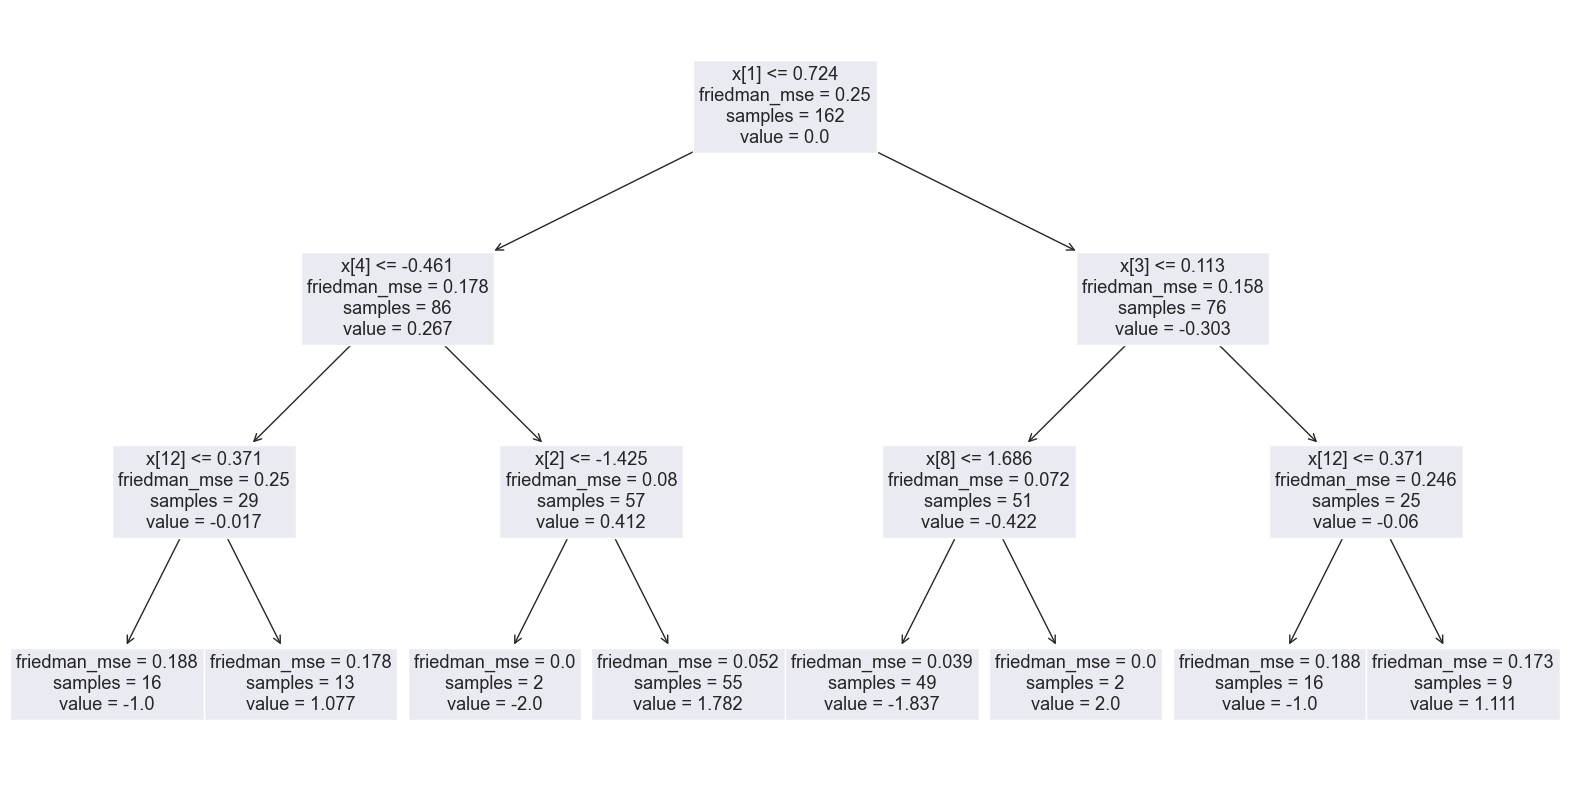

In [365]:
from sklearn.tree import plot_tree
import pickle
save_gb=pickle.dumps(gb)
model = pickle.loads(save_gb)
model.predict(x_test)
plt.figure(figsize=(20,10))
plot_tree(gb.estimators_[0,0])
plt.show()


### XG Boosting

In [366]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [367]:
y_pred=xgb.predict(sc_xtest)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1])

In [368]:
y_pred1=xgb.predict(x_sm)
y_pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [369]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       1.00      0.77      0.87        26

    accuracy                           0.87        45
   macro avg       0.88      0.88      0.87        45
weighted avg       0.90      0.87      0.87        45



In [370]:
print(classification_report(y_sm,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        81

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



### Hyperparameter Tuning:

In [371]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,1,0.4,5],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2],
              'max_depth': [5,10,15,20],
              'n_estimators': [50,65,80,100],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6]}


In [372]:
Xgb = XGBClassifier(random_state=42, verbosity=0, silent=0)
rcv= RandomizedSearchCV(estimator=Xgb, scoring='f1',param_distributions=param_grid, n_iter=100, cv=5, 
                               verbose=2, random_state=42, n_jobs=-1)
rcv.fit(x_sm,y_sm)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 1, 0.4, 5],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [50, 65, 80, 100],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6]},
                   random_state=42, scoring='f1', verbose=2)

In [373]:
rcv.best_params_

{'reg_lambda': 1.6,
 'reg_alpha': 0.1,
 'n_estimators': 50,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0}

In [374]:
XGB = XGBClassifier(reg_lambda=0.8,reg_alpha=0.2,n_estimators=80,max_depth=5,learning_rate=0.15,gamma=0.8)
XGB.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.8, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Testing of XGB

In [375]:
y_pred_1=XGB.predict(sc_xtest)
y_pred_1

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1])

In [376]:
acc_XGB =accuracy_score(y_test,y_pred_1)
acc_XGB

0.8222222222222222

### Training of XGB

In [377]:
y_pred_2=XGB.predict(x_sm)
y_pred_2

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [378]:
acc_XGB_tr =accuracy_score(y_sm,y_pred_2)
acc_XGB_tr

0.9814814814814815

### MLP Classifier

In [379]:
from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(hidden_layer_sizes=(100,50),
                      max_iter=100,
                       activation='relu',
                       solver='adam',
                       alpha=0.001,
                       verbose=3,
                       random_state=42
                      )
neural.fit(x_sm,y_sm)

Iteration 1, loss = 0.72535451
Iteration 2, loss = 0.69694084
Iteration 3, loss = 0.66992346
Iteration 4, loss = 0.64438308
Iteration 5, loss = 0.62041495
Iteration 6, loss = 0.59788285
Iteration 7, loss = 0.57666600
Iteration 8, loss = 0.55680879
Iteration 9, loss = 0.53818707
Iteration 10, loss = 0.52080329
Iteration 11, loss = 0.50461096
Iteration 12, loss = 0.48954257
Iteration 13, loss = 0.47548903
Iteration 14, loss = 0.46229160
Iteration 15, loss = 0.44989263
Iteration 16, loss = 0.43813228
Iteration 17, loss = 0.42706221
Iteration 18, loss = 0.41657491
Iteration 19, loss = 0.40671580
Iteration 20, loss = 0.39749101
Iteration 21, loss = 0.38872601
Iteration 22, loss = 0.38041940
Iteration 23, loss = 0.37261831
Iteration 24, loss = 0.36531658
Iteration 25, loss = 0.35846955
Iteration 26, loss = 0.35203276
Iteration 27, loss = 0.34589579
Iteration 28, loss = 0.33996521
Iteration 29, loss = 0.33420043
Iteration 30, loss = 0.32862846
Iteration 31, loss = 0.32326333
Iteration 32, los

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 50), max_iter=100,
              random_state=42, verbose=3)

In [380]:
y_pred=neural.predict(sc_xtest)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [381]:
MLP_acc =accuracy_score(y_test,y_pred)
MLP_acc

0.8666666666666667

In [382]:
y_pred1=neural.predict(x_sm)
y_pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [383]:
MLP_acc_tr=accuracy_score(y_sm,y_pred1)
MLP_acc_tr

0.9814814814814815

## Overall performance of Classification Models

In [384]:
data =pd.DataFrame({'Models':['Logistic_Regression','LR_Bagging','SVC','SVC_Bagging','KNN','KNN_Bagging',
                              "Decision Tree",'DT_Bagging','Random Forest','RF_Bagging','GB','XGB','MLP'],
       'Training(Accuracy)':[lr_acc_tr,lr_Bagg_tr,sc_acc_hyp_tr,sc_Bagg_tr,acc_knn_tr,knn_Bagg_tr,
                             acc_DT_tr,DT_Bagg_tr,acc_RF_hyp,RF_Bagg_tr,acc_gb_tr,acc_XGB_tr,MLP_acc_tr],
       'Testing(Accuracy)':[lr_acc,lr_Bagg,sc_acc_hyp,sc_Bagg,acc_knn,knn_Bagg_tr,acc_DT,DT_Bagg,acc_RF_tr,RF_Bagg,
                            acc_gb,acc_XGB,MLP_acc]})

In [385]:
data

,Models,Training(Accuracy),Testing(Accuracy)
0,Logistic_Regression,0.882716,0.800000
1,LR_Bagging,0.888889,0.800000
2,SVC,1.000000,0.800000
3,SVC_Bagging,1.000000,0.844444
4,KNN,0.882716,0.866667
5,KNN_Bagging,0.888889,0.888889
6,Decision Tree,0.925926,0.733333
7,DT_Bagging,0.975309,0.844444
8,Random Forest,0.533333,0.617284
9,RF_Bagging,0.932099,0.844444


In [386]:
Models=['Logistic_Regression','LR_Bagging','SVC','SVC_Bagging','KNN','KNN_Bagging', "Decision Tree",'DT_Bagging','Random Forest','RF_Bagging','GB','XGB','MLP']
te_Accuracy=[lr_acc,lr_Bagg,sc_acc_hyp,sc_Bagg,acc_knn,knn_Bagg_tr,acc_DT,DT_Bagg,acc_RF_tr,RF_Bagg,acc_gb,acc_XGB,MLP_acc]

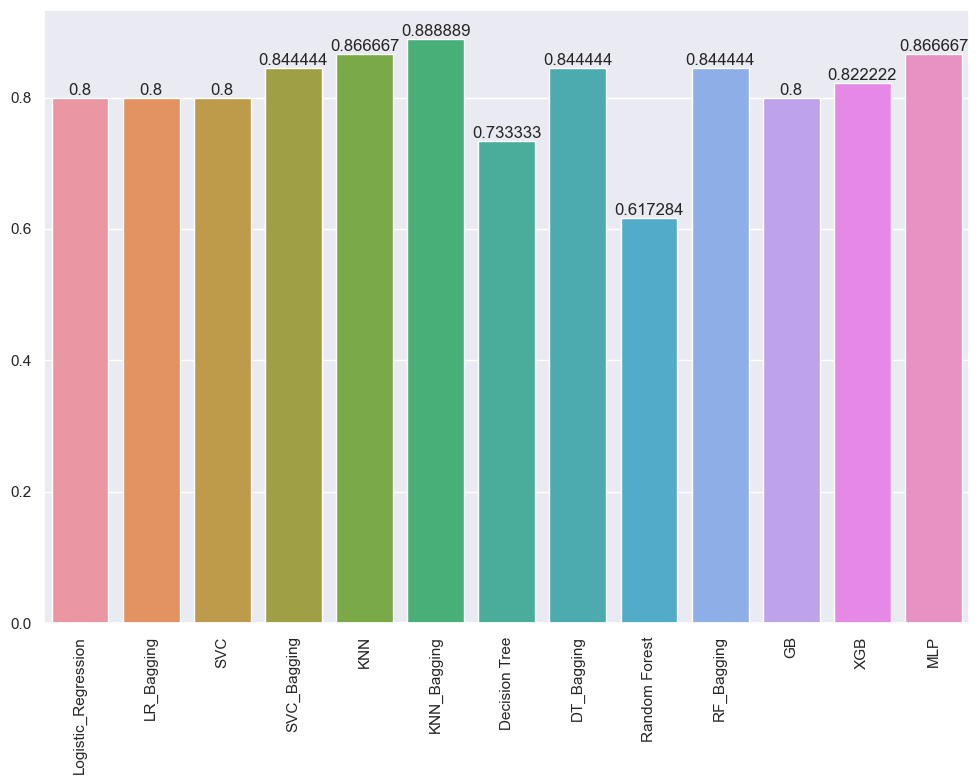

In [387]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=Models,y=te_Accuracy)
sns.set_theme(style="darkgrid")
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)
plt.tight_layout()


In [388]:
 """"['slope_segment', 'thal', 'rest_bp', 'chest_pain', 'Vessels', 'diabates',
       'rest_ekg', 'cholesterol', 'stress_test', 'sex', 'age', 'heart_rate',"eia"]"""
                                                                                       
check_arry=([[-0.84315626,  0.84696168, -1.35639552, -0.14785209,  0.33601955,2.20670914,  1.01870703,  0.48250936, -0.94242362, -1.41421356,
         1.82445452, -0.89061397, -0.6953535 ]])
#heck_arry=np.asanyarray(checking_data)

checking_LR_prediction=lr.predict(check_arry)
checking_KNN_prediction=knn1.predict(check_arry)
checking_SVM_prediction=grid.predict(check_arry)
checking_DT_prediction=DT.predict(check_arry)
checking_RF_prediction=RF.predict(check_arry)
checking_Gb_prediction=gb.predict(check_arry)
checking_XGb_prediction=XGB.predict(check_arry)
checking_MLP_prediction=neural.predict(check_arry)

checking_LR_bagg_prediction=model1.predict(check_arry)
checking_SVM_Bagg_prediction=model2.predict(check_arry)
checking_knn_Bagg_prediction=model3.predict(check_arry)
checking_DT__bagg_prediction=model4.predict(check_arry)
checking_RF_bagg_prediction=model5.predict(check_arry)


print("Based on Random data ","Predited_Insurence_Price_Linear_Regression:",checking_LR_prediction)
print("Based on Random data ","Predited_Insurence_Price_Linear_Regression_bagg:",checking_LR_bagg_prediction)

print("Based on Random data ","Predited_Insurence_Price_knn:",checking_KNN_prediction)
print("Based on Random data ","Predited_Insurence_Price_knn_bagging:",checking_knn_Bagg_prediction)

print("Based on Random data ","Predited_Insurence_Price_SVM: ",checking_SVM_prediction)
print("Based on Random data ","Predited_Insurence_Price_SVM_bagging: ",checking_SVM_Bagg_prediction)

print("Based on Random data ","Predited_Insurence_Price_Desion_Tree:",checking_DT_prediction)
print("Based on Random data ","Predited_Insurence_Price_Desion_Tree_bagging:",checking_DT__bagg_prediction)

print("Based on Random data ","Predited_Insurence_Price_Random_Forest:",checking_RF_prediction)
print("Based on Random data ","Predited_Insurence_Price_Random_Forest_bagging:",checking_RF_bagg_prediction)

print("Based on Random data ","Predited_Insurence_Price_Gradient_Boosting:",checking_Gb_prediction)
print("Based on Random data ","Predited_Insurence_Price_XGradient_Boosting:",checking_XGb_prediction)
print("Based on Random data ","Predited_Insurence_Price_MLP:",checking_MLP_prediction)







Based on Random data  Predited_Insurence_Price_Linear_Regression: [0]
Based on Random data  Predited_Insurence_Price_Linear_Regression_bagg: [0]
Based on Random data  Predited_Insurence_Price_knn: [0]
Based on Random data  Predited_Insurence_Price_knn_bagging: [0]
Based on Random data  Predited_Insurence_Price_SVM:  [0]
Based on Random data  Predited_Insurence_Price_SVM_bagging:  [0]
Based on Random data  Predited_Insurence_Price_Desion_Tree: [0]
Based on Random data  Predited_Insurence_Price_Desion_Tree_bagging: [0]
Based on Random data  Predited_Insurence_Price_Random_Forest: [0]
Based on Random data  Predited_Insurence_Price_Random_Forest_bagging: [0]
Based on Random data  Predited_Insurence_Price_Gradient_Boosting: [0]
Based on Random data  Predited_Insurence_Price_XGradient_Boosting: [0]
Based on Random data  Predited_Insurence_Price_MLP: [0]


# Conclusion:-
    - Using Random SVM, we achieved almost similar accuracy score i.e, above 88%, meaning that we are actually able to 
    predict values quite near to the actual prices for majority of the rows.

    - So we can use one predictive models, SVM giving the highest performance, for production to solve our problem in 
    predicting the Heart diseases.

In [389]:
sc_xtest

array([[-0.84315626,  0.84696168,  0.43951103, -1.19838008,  1.39096463,
         2.20670914,  1.01870703,  1.70833033, -0.94242362, -1.41421356,
         0.32753181,  0.12013249, -0.6953535 ],
       [-0.84315626,  0.84696168, -1.35639552, -0.14785209,  0.33601955,
         2.20670914,  1.01870703,  0.48250936, -0.94242362, -1.41421356,
         1.82445452, -0.89061397, -0.6953535 ],
       [-0.84315626,  0.84696168, -1.21824886,  0.9026759 ,  0.33601955,
        -0.45316348,  1.01870703,  1.05001907, -0.94242362,  0.70710678,
        -1.2845388 ,  0.16607551, -0.6953535 ],
       [ 0.71610532, -0.83450636,  1.06117099,  0.9026759 ,  1.39096463,
        -0.45316348,  1.01870703,  0.86841596,  2.00167662,  0.70710678,
         0.55782761, -0.33929772,  1.43811746],
       [-0.84315626,  0.84696168,  0.71580435, -1.19838008,  1.39096463,
        -0.45316348, -0.98896376, -1.10651781, -0.94242362, -1.41421356,
         0.90327131,  1.36059405, -0.6953535 ],
       [ 0.71610532, -0.834506

In [390]:
y_test

19     1
42     0
153    1
78     1
145    0
15     1
24     0
68     0
113    1
118    1
93     1
159    1
69     1
142    0
45     1
16     0
51     0
125    0
96     1
56     1
97     0
120    1
143    1
30     0
9      0
172    1
60     0
18     0
148    1
173    1
109    1
55     0
140    1
126    0
66     1
29     0
117    1
65     1
67     0
31     1
12     1
41     0
124    1
100    0
161    1
Name: heart_disease, dtype: int64